Product Delivery Interval Optimiser 
=============

Based on Customer Segmentation 
------------



## Step 1 : Load Wholesale customer Data

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.



In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Step 2 : Exploratory Analysis 
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. We will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Running the code block below, we will be able to observe a statistical description of the dataset. The dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. We should also consider what each category represents in terms of products we could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

1. Fresh Category is the most popular category.
2. Delicateseens it the least  popular category amogst the  size categories.


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [85, 181, 183]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples-np.round(data.mean()))
display(samples-np.round(data.median()))


Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    4117  40401    84829   -2046             37946          1419
1  100151  23831    10197   13673              2067          7025
2   24847  38154    12219   33462             -2642         46418

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    7613  42570    88024    -500             40011          1978
1  103647  26000    13392   15219              4132          7584
2   28343  40323    15414   35008              -577         46977

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**          
Customer 0 : Supermarket with  fresh vegetable/ fruit sections also partially available.                  
Rationale : Buys  a  significantly more grocery i.e( 84k more than average customers) followed by milk i.e (40K more than avg customers) and detergents i.e (37K more than the avg. customers), but is observed to almost not buy  frozen ($500 less than avg customer purchase  ) and delicatessen i.e ( just 1.4K more than average). The customer appear to be extremely voracious consumer of the grocery, milk and detergent papers.           
           
Customer 1 : Markets or possible Greengrocer [1]     
Rationale : Buys  significantly more 
fresh products( i.e 100K more than the average customers), followed by milk i.e ( 23K more than the average customers), followed by  frozen(i.e 13k more than average customers ), followed by 
grocery( i.e 13K more than average customers) and others. The customer seem to buy extreme amount of fresh, milk , grocery and frozen products, in alignment with the "Markets".  
          
Customer 2 :   Delicatessen[1]             
Rationale : Buys  a lot of  Delicatessen (i.e 46K more than the average customers), followed by milk (i.e  38K more than average customers (might be milk delicacy i.e goat milk) ), followed by Frozen (i.e 33K more than the average customers ), followed by grocery (i.e 12 k more than the average).  The customer hence is likely to be Delicatessen, selling a lot of delicacies (i.e find food)               
             
Ref 1: https://en.wikipedia.org/wiki/Grocery_store


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
import sklearn 
from sklearn.tree import DecisionTreeRegressor
new_data = pd.DataFrame.copy(data)
new_data.drop(['Fresh'], axis = 1, inplace = True)
print(new_data.head())

# TODO: Split the data into training and testing sets using the removed feature as the target label
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(new_data, data['Fresh'], test_size = 0.25, random_state = 40)


# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state  = 2)
regressor.fit(X_train, y_train) 
print(regressor)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print('Score of the prediction using the test set is',score)

   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  9656     7561     214              2674          1338
1  9810     9568    1762              3293          1776
2  8808     7684    2405              3516          7844
3  1196     4221    6404               507          1788
4  5410     7198    3915              1777          5185
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=2,
           splitter='best')
('Score of the prediction using the test set is', -0.50029244159308517)


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**     
1. Feature attempted to predict               : Fresh
2. Reported Prediction Score                  : -0.5
3. Is the feature necessary for identifying customer's spending habit : Yes, as the model fails to fit the data i.e predict the feature (Fresh), when all the other features are available, this implies that the feature s necessary feature.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

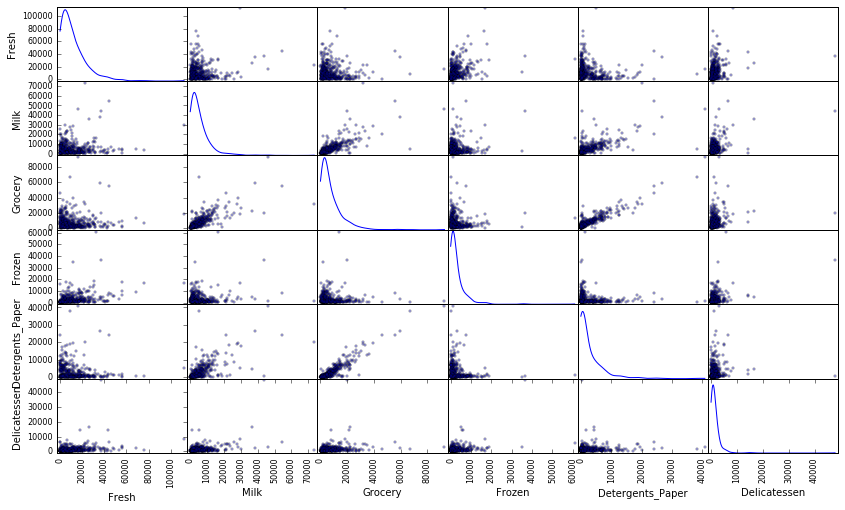

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
Yes, there are pair of features, that exhibit  some degree of correlation i.e Milk vs Grocery, Milk vs Detergent_paper and grocery vs detergent_papers.        
Yes, it does confirm our suspicions about the relevance of the feature we tried to predict.  We  predicted that the featues "Fresh" is independent  and  hence highly relevant, which we as observed in the scatter plots appears as so. There exists no concrete but rather random distribution when the dta was plotted against  all the other features.            
Highly skewed distribution of the data was observed. Almost all the features haver been observed as highly right skewed data distribution.

In [7]:
# Testing the correlated  features,  in the same earlier way
import sklearn 
from sklearn.tree import DecisionTreeRegressor
new_data = pd.DataFrame.copy(data)
new_data.drop(['Milk'], axis = 1, inplace = True)
print(new_data.head() )
#print(data['Milk'].head())
#print(data.head())


# TODO: Split the data into training and testing sets using the removed feature as the target label
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(new_data, data['Milk'], test_size = 0.25, random_state = 40)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state  = 5, max_depth = 2)
regressor.fit(X_train, y_train) 
#print(regressor)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print('Score of the prediction using the test set is',score)

   Fresh  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669     7561     214              2674          1338
1   7057     9568    1762              3293          1776
2   6353     7684    2405              3516          7844
3  13265     4221    6404               507          1788
4  22615     7198    3915              1777          5185
('Score of the prediction using the test set is', 0.28442881091521077)


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

------------------------- Np log of the sample, data is
       Fresh       Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
0   9.687630  10.740670  11.437986   6.933423         10.617099      7.987524
1  11.627601  10.296441   9.806316   9.725855          8.506739      9.053687
2  10.514529  10.690808   9.911952  10.505999          5.476464     10.777768
------------------------- Np log of the whole dataset is
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1  8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
2  8.756682  9.083416  8.946896  7.785305          8.165079      8.967504


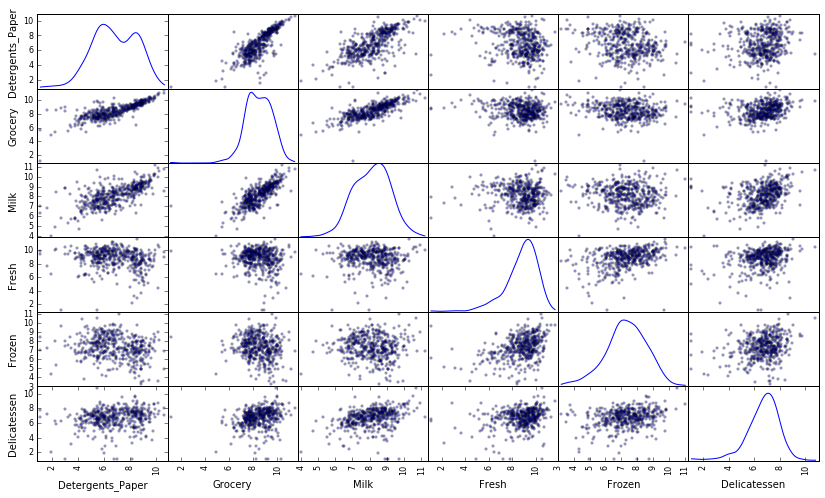

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log( pd.DataFrame.copy(data))
#log_data.drop(['Milk'], axis = 1, inplace = True)
#print(log_data.head())

# TODO: Scale the sample data using the natural logarithm
#data.sample(n = 5,random_state = 1 )
log_samples = np.log(samples)
print('------------------------- Np log of the sample, data is')
print(log_samples)
print('------------------------- Np log of the whole dataset is')
print(log_data.loc[log_samples.index])

# Produce a scatter matrix for each pair of newly-transformed features, 
# with features reordered with highly correlated features first 
ix_reord = ['Detergents_Paper','Grocery', 'Milk' , 'Fresh' , 'Frozen','Delicatessen']
pd.scatter_matrix(log_data[ix_reord], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)


Fresh       Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
0   9.687630  10.740670  11.437986   6.933423         10.617099      7.987524
1  11.627601  10.296441   9.806316   9.725855          8.506739      9.053687
2  10.514529  10.690808   9.911952  10.505999          5.476464     10.777768

** Answer **
1. Correlataion  among the features identified earlier as being correlated still exists.       
Milk vs Grocery		             : Present (Stronger than before)		
Milk vs Detergent_paper          : Present (Stronger than before)            
Grocery vs Detergent_papers      : Present (Weaker than before)              

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
from sets import Set
outliers_more_than_once  = Set()

idx = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)    
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)    
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    #print('Q1',Q1,'Q3',Q3,step)
    #display(log_data[feature].describe())
    
    # Display the outliers    
    #print "Data points considered outliers for the feature '{}' with Q1 : {} , Q3 : {} :".format(feature,Q1,Q3)    
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])        
    
    # Gather the indexes of all the outliers
    # print(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index, feature)
    idx += log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    
    #outliers.extend(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    #print('No of outlier to be removed, after considering the outlier for feature ::(',features_considered_till_now ,') is ', len(outliers),' Outliers are',outliers)

#print('outlier index is',sorted(idx))


for i in idx:
    if idx.count(i) > 1:                
        outliers_more_than_once.add(i)

print 'Outliers occuring more than once',outliers_more_than_once

#Inspecting outlier data
indices = [65, 66, 75, 128, 154]
# Create a DataFrame of the chosen samples
outliers_data = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(outliers_data)
display(outliers_data-np.round(data.mean()))
display(outliers_data-np.round(data.median()))


# OPTIONAL: Select the indices for data points you wish to remove
outliers = []  # none outlier selected for removal,  reasoning below

# Remove the outliers, if any were specified
print('Prior to outlier removal as identified for all features,  no of data point is ',len(log_data))
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print('After removal  of all outlier identified across all feature, no of data point is ',len(good_data))    


Outliers occuring more than once Set([128, 65, 66, 75, 154])
Chosen samples of wholesale customers dataset:


c:\python27\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: the sets module is deprecated
  if __name__ == '__main__':


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0     85  20959    45828      36             24231          1423
1      9   1534     7417     175              3468            27
2  20398   1137        3    4407                 3           975
3    140   8847     3823     142              1062             3
4    622     55      137      75                 7             8

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0 -11915  15163    37877   -3036             21350          -102
1 -11991  -4262     -534   -2897               587         -1498
2   8398  -4659    -7948    1335             -2878          -550
3 -11860   3051    -4128   -2930             -1819         -1522
4 -11378  -5741    -7814   -2997             -2874         -1517

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  -8419  17332    41072   -1490             23415           457
1  -8495  -2093     2661   -1351              2652          -939
2  11894  -2490    -4753    2881              -813             9
3  -8364   5220     -933   -1384               246          -963
4  -7882  -3572    -4619   -1451              -809          -958

('Prior to outlier removal as identified for all features,  no of data point is ', 440)
('After removal  of all outlier identified across all feature, no of data point is ', 440)


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**  
**Question :** Are there any data points considered outliers for more than one feature?              
**Answer :** Yes, there are more than one data points that are considered outliers for more tha one featuer for e.g  data with index (154 => outlier for   Milk, Grocery and Delicatessen, 75 => Grocery and Detergents_Paper, 65 => Grocery and Fresh  e.t.c)     
 
**Question :** Should these data points be removed from the dataset? If any data points were added to the outliers list to be removed, explain why.          
**Answer :** No, just because some category / set of categories of products is bought more or less, does not imply that it is invalid data. In fact in the Retail market domain, in fact it seems extremely valid as well. For example, a Delicatessen or fine food shop is likely to buy a lot of fresh, delicatessen but  very few  grocery and detergent_paper items, which can  make them appear as outliers for those two particular categories, however  they will be inline with their speciality and novelty.
	

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

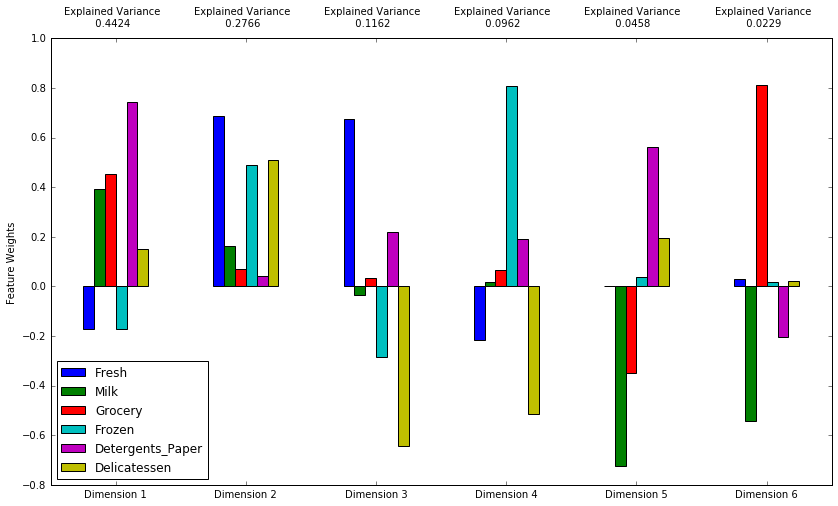

In [11]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(good_data)
#print(pca.explained_variance_ratio_)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)



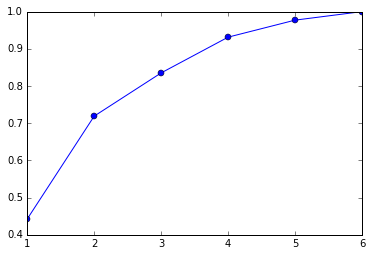

In [12]:
# plot the variances
import matplotlib.pyplot as plt

x = np.arange(1,7)
_ = plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**             
Total Variance explained by the 1st and 2nd principal component: 0.72                    
Total variance explained by the first 4 principal components : 0.9314  
                            
**Qn : Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending **               
**Answer**: First principal component Dimension : The dimension 1 represents  the majority of the Customers spending in the Detergents_Paper followed by the Grocery, Milk and Delicatessen Category as ( about 0.8,0.42,0.39 and 0.2) respectively. In addition ,on the contrary it represent the cusotmers  negative spending in the Fresh and the Frozen category i.e (-0.2 and -0.2 respectively) i.e the fewer the customers spend on these two categories, the more this particular dimension represents them.
Second PCA dimension : The dimension two represents the majority of the Customers spending in the Fresh, Delicatessen, Frozen on the majority basis( about 0.7, 0.53 and 0.5) respectively, hwile representing the customer's spending on Milk, Grocery and Detergents in minute scale i.e(0.2, 0.1  and  0.05 respectively).
Third PCA dimension : This dimension represents the majority of the Customers Spending of Fresh category with mediocre representation of customer spending on Detergent and negligibly Grocery i.e (0.7,0.2 and 0.02 respectively). While  in addition, on the contrary this dimension negatively relates with the customer's spending on Delicatessen on majority basis, Frozen on medium and Milk  on negligible basis (i.e -0.7, -0.3,-0.1 respectively).
Fourth PCA Dimension : This dimension represents the majority of the Customers Spending of Frozen category with mediocre representation of customer spending on Detergent and negligibly Grocery, Milk i.e (0.8,0.2 ,0.07 and 0.01 respectively). While  in addition, on the contrary this dimension negatively relates with the customer's spending on Delicatessen on majority basis,  and Fresh category on  medium level (i.e -0.6 and -0.25 respectively).


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
# log_samples1 = np.log(data.sample(n = 1,random_state = 1 ))
# pca_samples1 = pca.transform(log_samples1)
# #print(log_samples.index[0])
# print(log_samples1)
# display(log_samples1)
# display(pd.DataFrame(np.round(pca_samples1, 4), columns = pca_results.index.values))

display(log_samples)
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Fresh       Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
0   9.687630  10.740670  11.437986   6.933423         10.617099      7.987524
1  11.627601  10.296441   9.806316   9.725855          8.506739      9.053687
2  10.514529  10.690808   9.911952  10.505999          5.476464     10.777768

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       5.3459       1.9442       0.7429      -0.2108      -0.5297   
1       2.1974       4.9048       0.0686       0.5623      -0.5195   
2       0.4585       5.3459      -2.6856      -0.0173      -2.1850   

   Dimension 6  
0       0.2928  
1      -0.2369  
2       0.2688

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
print('Sucessfully created DataFrame for reduced data')

Sucessfully created DataFrame for reduced data


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

Dimension 1  Dimension 2
0       5.3459       1.9442
1       2.1974       4.9048
2       0.4585       5.3459

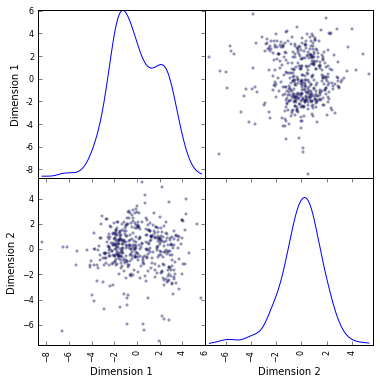

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (6,6), diagonal = 'kde');

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**         
**1. K-Means**: Hard cluster assignment i.e a instance wither belogs to a class or it doesnot.                  
Advantages:  General purpose , fast[1] and scalable[2] algorithm with application in diff fields.                   
Disadvantages :       
1. Fails with local minima. It is hence useful, to restart it several times.
2. Sensitive to incorrect number of clusters, anisotropic distributed blobs, unequal variance[2]
3. Not good for uneven cluster size, and too many clusters.

**2. Gaussian Mixture Model clustering:** : Soft cluster assignment i.e a instance can belong to multiple classes with probability of belonging to each class, clearly definde by the GMM clustering model.                
Advantage :       
1. Can be thought of as genralising k-means that also incorporates information about the co-variance.[3]
1. Can learn Gaussian mixture models i.e (diagonal, spherical, tied and full covariance  clustered data) [3]
2. Probabilistic model, that can cluster points  along with their cluster inclusion probbility. [3]
3. Good for  density estimated clustering.                       
Disadvantage : Not scalable.[4]

**Choice of Algorithm :**         
Since in our "Feature scaling section",  while observing the scatter plot, we do not observe complex shapes, spherical, diagonal or other complex patterns in the data, when each of those features were compared across each other,  and in line with the  Occam's Razor principle and because k-means is fast and generic, we  choose the simple generic k-means algorithm as  our choice of algorithm.  
PS : The gaussian modles has  also been tried as practice session, however.


Ref :
1. http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
2. http://scikit-learn.org/stable/modules/clustering.html#k-means
3. http://scikit-learn.org/stable/modules/mixture.html
4. http://scikit-learn.org/stable/modules/clustering.html



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

**Silhouette Score **            
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. [1]
Ref:
1. http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [16]:
# TODO: Apply your clustering algorithm of choice to the reduced data -- try both knn and gaussian
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1.0
best_cluster_size = 1
run_cluster_score_until_cluster_size = 15
for n_clusters in range(2,run_cluster_score_until_cluster_size):
    # for the last run, run the cluster with the best cluster size
    if n_clusters == run_cluster_score_until_cluster_size-1:
        n_clusters = best_cluster_size
        
    clusterer = KMeans(n_clusters = n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    #print(preds)
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print('No of CLuster ::',n_clusters,'score is ',score)
    if best_score < score:
        best_score        = score
        best_cluster_size = n_clusters 
print('best cluster size is ::',best_cluster_size, ' Best cluster score is ::',best_score)


('No of CLuster ::', 2, 'score is ', 0.41916608320292309)
('No of CLuster ::', 3, 'score is ', 0.39597528613124733)
('No of CLuster ::', 4, 'score is ', 0.33050326144109526)
('No of CLuster ::', 5, 'score is ', 0.35080703525288243)
('No of CLuster ::', 6, 'score is ', 0.34945107770606848)
('No of CLuster ::', 7, 'score is ', 0.36034840453136718)
('No of CLuster ::', 8, 'score is ', 0.3536793070701944)
('No of CLuster ::', 9, 'score is ', 0.35942937617062387)
('No of CLuster ::', 10, 'score is ', 0.34762959038453989)
('No of CLuster ::', 11, 'score is ', 0.33570009644192556)
('No of CLuster ::', 12, 'score is ', 0.35456243201458176)
('No of CLuster ::', 13, 'score is ', 0.35735878946841942)
('No of CLuster ::', 2, 'score is ', 0.41916608320292309)
('best cluster size is ::', 2, ' Best cluster score is ::', 0.41916608320292309)


In [17]:
# TODO: Apply gaussian mixture model gaussian
from sklearn import mixture 
import numpy as np
from sklearn.metrics import silhouette_score

best_score = -1.0
best_cluster_size = 1
best_covariance_type = None
np.random.seed(1)
n_components_range = [2,3,4,5,6,7,8,9,10,11,None]
cv_types = ['spherical','tied','diag','full']

for cv_type in cv_types:
    for n_components in n_components_range:
        if cv_type == cv_types[-1]  and n_components == n_components_range[-1]:
            print('best cluster size is ::',best_cluster_size, 'Best cv type is ',best_covariance_type,' Best cluster score is ::',best_score)
            n_components = best_cluster_size
            cv_type = best_covariance_type     
        #elif cv_type != cv_types[-1] or (cv_type == cv_types[-1]  and n_components == n_components_range[-1]):    
        if n_components != None:
            clusterer_gaus = mixture.GMM( n_components=n_components, covariance_type=cv_type ).fit(reduced_data)
        #print(clusterer.means_)

            # TODO: Predict the cluster for each data point
            preds_gaus = clusterer_gaus.predict(reduced_data)
            #print(preds)
            # TODO: Find the cluster centers
            centers_gaus = clusterer_gaus.means_

            # TODO: Predict the cluster for each transformed sample data point
            sample_preds_gaus = clusterer_gaus.predict(pca_samples)

            # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
            score = silhouette_score(reduced_data, preds)
            print('No of CLuster ::',n_components,' cv_type',cv_type,'score is ',score)
            if best_score < score:
                best_score        = score
                best_cluster_size = n_components
                best_covariance_type = cv_type  

print('Final best cluster size is ::',best_cluster_size, 'Best cv type is ',best_covariance_type,' Best cluster score is ::',best_score)



('No of CLuster ::', 2, ' cv_type', 'spherical', 'score is ', 0.41916608320292309)
('No of CLuster ::', 3, ' cv_type', 'spherical', 'score is ', 0.41916608320292309)
('No of CLuster ::', 4, ' cv_type', 'spherical', 'score is ', 0.41916608320292309)
('No of CLuster ::', 5, ' cv_type', 'spherical', 'score is ', 0.41916608320292309)
('No of CLuster ::', 6, ' cv_type', 'spherical', 'score is ', 0.41916608320292309)
('No of CLuster ::', 7, ' cv_type', 'spherical', 'score is ', 0.41916608320292309)
('No of CLuster ::', 8, ' cv_type', 'spherical', 'score is ', 0.41916608320292309)
('No of CLuster ::', 9, ' cv_type', 'spherical', 'score is ', 0.41916608320292309)
('No of CLuster ::', 10, ' cv_type', 'spherical', 'score is ', 0.41916608320292309)
('No of CLuster ::', 11, ' cv_type', 'spherical', 'score is ', 0.41916608320292309)
('No of CLuster ::', 2, ' cv_type', 'tied', 'score is ', 0.41916608320292309)
('No of CLuster ::', 3, ' cv_type', 'tied', 'score is ', 0.41916608320292309)
('No of CLus

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
For the scores of several clusters tried, see the  score in the earlier code run.            
Best silhoutte score is  0.419 for  2 clusters ( K-means ).


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

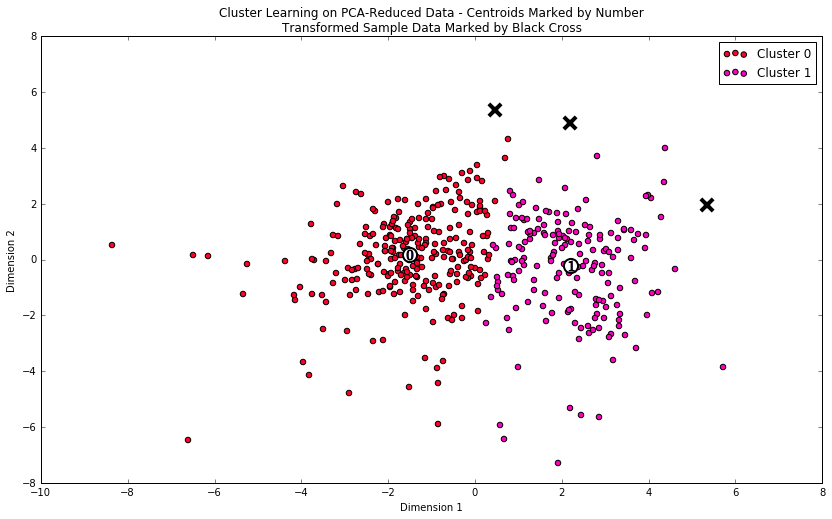

In [18]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [19]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print('1.0 Absolute Purchase  for Each Category  Per Customer Segment Group')
display(true_centers)

print('2.0 Purchase  for Each Category  Per Customer Segment Group, as observed different to average customer purchase')
display(true_centers - np.round(data.mean()))

print('3. 0 Purchase  for Each Category  Per Customer Segment Group, as observed different to average customer purchase, excluding the extreme values i.e median')
display(true_centers - np.round(data.median()))

1.0 Absolute Purchase  for Each Category  Per Customer Segment Group


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   8994  1909     2366    2081               290           681
Segment 1   3570  7749    12463     900              4567           966

2.0 Purchase  for Each Category  Per Customer Segment Group, as observed different to average customer purchase


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  -3006 -3887    -5585    -991             -2591          -844
Segment 1  -8430  1953     4512   -2172              1686          -559

3. 0 Purchase  for Each Category  Per Customer Segment Group, as observed different to average customer purchase, excluding the extreme values i.e median


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0    490 -1718    -2390     555              -526          -285
Segment 1  -4934  4122     7707    -626              3751             0

In [20]:
display(samples)

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   16117  46197    92780    1026             40827          2944
1  112151  29627    18148   16745              4948          8550
2   36847  43950    20170   36534               239         47943

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**    
Segment 0 Customer Cluster : Most likely "Super Markets", as they tend to buy a lot of  grocery, milk and detergents. As also observed during the comparision with median customer purchases(3.0),  the  customers in the "Cluster 0" tend to buy a lot of Grocery Items (7.7 K more than  median avg. purchase ) followed by Milk Items (i.e 4.1K more than avg. median purchases), followed by Detergent_Paper Items (i.e 3.7K more than avg. median customer purchase), while they tend to buy not  a lot,  in fact less of Fresh items, Frozen Items i.e -4.9K and -0.6K respectively, than the avergae customers

Segment 1 Customer Cluster :  Most likely "Green Gorcers or Farmers market", as they tend to buy  with focus on  fresh category, and frozen with strongly unfavored purchase of Milk, Grocery, Detergents_Paper (-1.7K, -2.3K and -0.5 (Customer Segment 1) vs 4.1K, 7.7K and 3.7K of Customer Segment 0 respectively) products.  As observed during the above comparision(3.0),  the  customers in the "Cluster 1" were observed to buy a lot of Milk and Grocery  and Detergent papers, which is exactly contrary to the customers in the "Cluster 0", where they bought a lot of those items. 


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [21]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**        
Prediction is consistent with Customer 0's charactersics, as highest grocery sales is consistent with the customer's portfolio, followed by Milk, Fresh and Detergent papers respectively. Also  the lowest amount of purchase  of the frozen and the delicatessen category for cluster 0 is in  consistence with the    customer 0.               
                      
Prediction for customer 1, however was found inconsistent with the cluster 0. The highest amount of purchase of the fresh category is in consistent more with the cluster segment 1. Hower it being classified as the cluster segment 0 is bit difficult to explain, with only explanation being Human understanding shortcoming.               
                     
Prediction for customer 2 as belonging to cluster segment 1 is  consistent with cluster 2. Cluster 2 represents a cluster which buys a lot less of Grocery but other products, which can also be seen in the  Customer Sample 2



## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**
A/B test are randomised experiments used extensively in marketing and business intelligence[1], to measure effectively, how and if each groups (in our case Customer Cluster Segment 0 and Segment 1)  respond differently to a certain variable(action i.e in our case change in delivery time). The A/B response, then provides the basis for the decision makers to make the informed decision.                
           
In our particular case, we will treat Customer "Cluster Segment 0" and "Segment 1" as two different groups and  implement the same action i.e expedited delivery from 5 to 3 days  to the sample of each groups and see how each  sampled groups respond to it i.e If each group respond to the change ? And if each groups do respond, then we want to observe how positively or how negatively they will respond to the change, so that the decision makers then can make informed decision, and determine with significant sound basis, which or if all groups should be provided the expedited delivery service.   
             
The first step into AB testing involves formulating the hypothesis i. the idea we want to test. In our case we will formulate  a one-sided hypothesis, The speed-up delivery increases the customer purchase amount for Customer Segment 0. And similarly we will also create a  one-sided hypothesis for the Cusotmer Segment 1 i.e "The speed-up delivery increases the customer purchase amount for Customer Segment 1".        
             
Now we have created the hypothes (i.e the main idea to test), the next major challenging step is to determine the treatment group size to run the sample test on. i.e determining the effective sample size for the experiments[2]. The goal being to contact just enough people to decide if the action should be launched at full scale.[2]. For example (10/ 10000), too few and the experiment might not have too much credibility to it, while too many (300/1000), the experiment cost significantly increases.  We have to find the goldilock zone / sweet spot, where  the sample is the most optimal in terms of both cost and the sample size. Though, there exists no optimal answer to sample size determination, and depends on assumptions and requirements[2], we will use the most commonly used "Prospective Power Analysis", a statistical technique to find out the representative sample size, for the level of confidence desired, by us[2], since the experiment in our case is going to have incurring costs involved. Also care must be taken to ensure that across each clusters, the control group i.e (curent Customer Segment 0 ) and the treatement group i.e carefully selected sample size, is not biased and is as representative as possible(e.g lets say there exists 10/100 customer who purchase large grocery items, but no other items, then if we take the sample, then we must make sure that at least representation fo those type of customers should be in the treatment group, the average purchase of the control and treatment should not be significantly off and many such aspects ) . Diff techniques such as  Return-On-Investment Analysis, Break-even Analysis can be used to determine the optimal treatment group size.[2]           
               
Now, once we finalise the treatment size i.e sample size for treatment groups, we can run the experiments. After the experiments is excuted, then   we can analyse the response from the  treatment groups for each cluster, and respond if the hypothesis is rejected ot accepted i.e if the speed-up delivery in fact increase the customers purchase amount or not.  We can also observe by what factor does the delivery speed up impacts each group purchase behaviour. And based on the response we can then determine, if we should run a full scale sped-up delivery service or not. And if yes, then to which group or both groups should we scale up the sped-up delivery, can be then known.                
                
As for looking at the data and judging by its characteristics, It is highly likely that the delivery service time from 3 days to 5 days is likely to affect the customers in different way. The first cluster of customers tends to buy the grocery more, which being the non-perishable good, is more likely to not suffer from the delayed delivery. However, in case of the cluster 2 i.e who buys the fresh foods  i.e perishable goods in the large quantity the delay  would likely mean, an impossible business as they cannot sell the perished goods to the customers. Hence for the customers in cluster 2, it might be more reasonable to decrease the customers delivery time from three days  down to small time intervals.

The company should most likely test the delayed delivery trials on the first group of customers, on the first basis. If the trial is a sucess then only they should go down testing to group 2, which is the more riskier group. Direct feedback or the customer survey for such groups may even be desired for the second groupd prior to conducting the trial on the second group, if they are concerned about the customer loss. 



Ref:
1. https://en.wikipedia.org/wiki/A/B_testing
2. http://multithreaded.stitchfix.com/blog/2015/05/26/significant-sample/



### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**             
The supervised learner now can, use this newly available clustering information for each customers as a additional customer feature,  now  to  predict a new feature for each customers.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

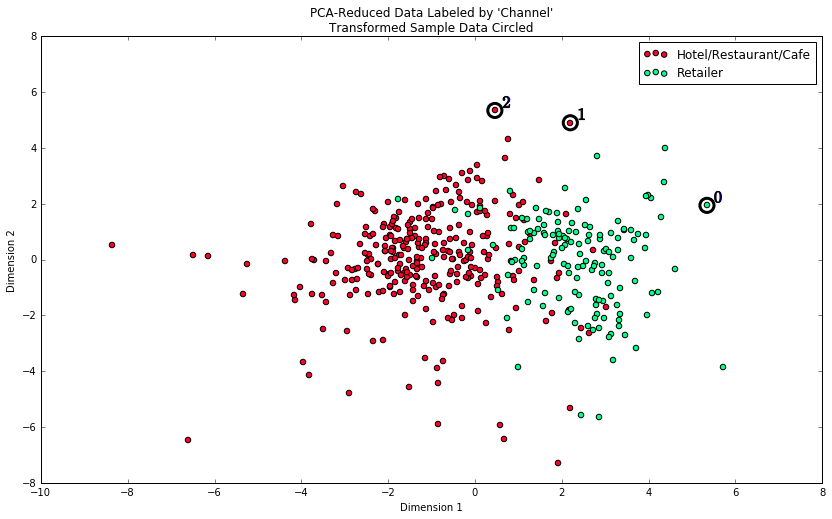

In [22]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**         
The clustering algorithm(k-means) and number of cluster(2) we have choosen  seems to not fit perfectly to the underlying distribution, considerig the fact that the distribution is represented  across two clusters with the retailers and  HoReC often crossing into each others as well.                 
These classifications  also seem to be inconsistent with our previous defination of the customer segments, the human  reasoning bias  most seemingly appearing to have come into effect, and we were unable to classify the hotels/ restaurant/ cafes as exactly as such and mistakenly classified it as  green grocer's and farmer's market, which  now taking into hotels into perspective seems  more  reasoned choice , as the customers tended to buy a lot grocery along with the fresh foods as well. The lack of business domain knowledge as to the type of customers that were involved with the company seems to have limited our analysis to incorrect conclusion in this particular case.
